In [1]:
# Dependencies and Setup
%matplotlib notebook 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_data_complete_df ["Mouse ID"].nunique() 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = mouse_data_complete_df['Mouse ID']
mouse_times = mouse_data_complete_df['Timepoint']

# print mouse group data
mouse_group = pd.DataFrame({"Mouse ID": mouse_id,
                             "Timepoint": mouse_times})

mouse_group


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete_df.drop_duplicates('Mouse ID')
clean_mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete ["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_df = mouse_data_complete_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = group_df.mean()['Tumor Volume (mm3)']
tumor_median = group_df.median()['Tumor Volume (mm3)']
tumor_variance = group_df.var()['Tumor Volume (mm3)']
tumor_stdev = group_df.std()['Tumor Volume (mm3)']
tumor_sem = group_df.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({'Mean': tumor_mean, 
                                   'Median': tumor_median,
                                   'Variance': tumor_variance,
                                   'Standard Deviation': tumor_stdev, 
                                   'SEM': tumor_sem})

regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  mouse_data_complete_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


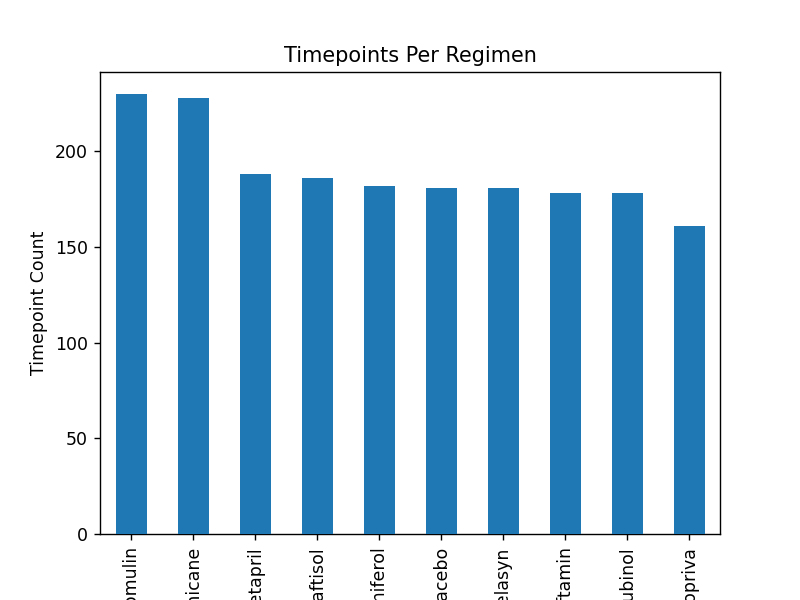

Text(0.5, 1.0, 'Timepoints Per Regimen')

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = mouse_data_complete_df['Drug Regimen'].value_counts().plot.bar(width=0.5, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Timepoint Count")
bar_plot.set_title("Timepoints Per Regimen")

<IPython.core.display.Javascript object>


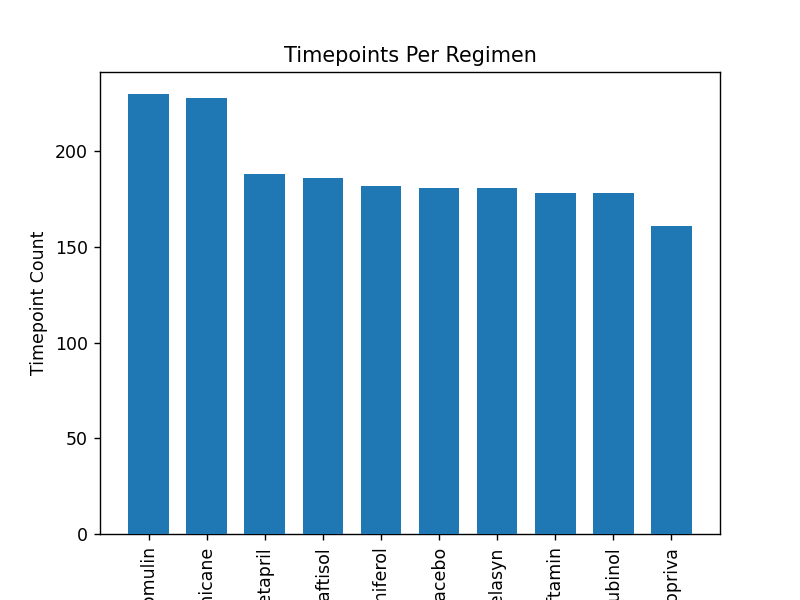

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = mouse_data_complete_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")
plt.title('Timepoints Per Regimen')

plt.show()

<IPython.core.display.Javascript object>


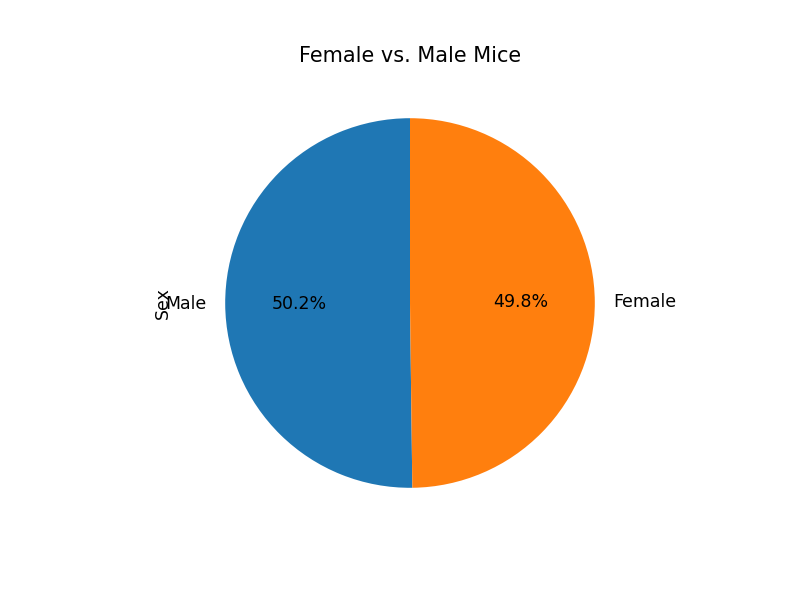

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mouse_data_complete['Sex'].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%", startangle=90)
plt.title('Female vs. Male Mice')
plt.show()

<IPython.core.display.Javascript object>


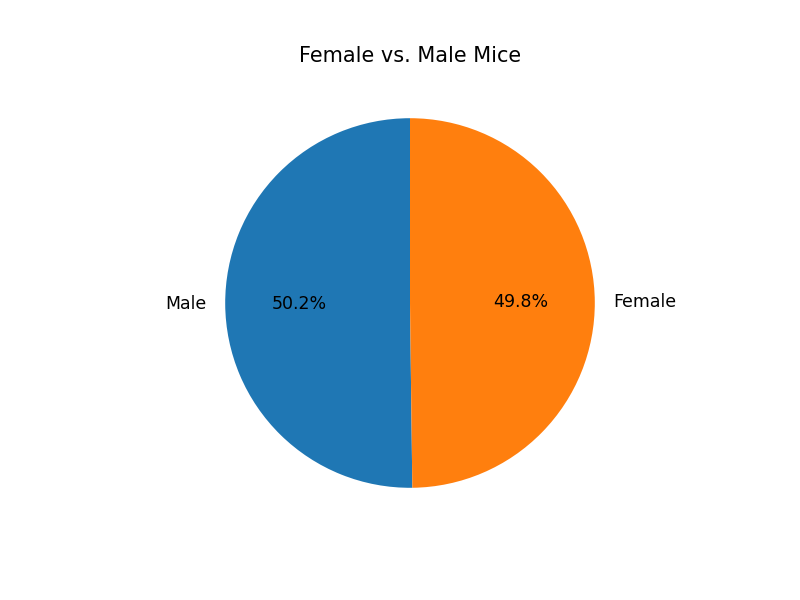

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_mouse_data_complete['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(mouse_data_complete_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_df = pd.merge(mouse_data_complete_df, max_timepoint_df, on='Mouse ID')
merged_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []
for drug in drugs:
    
    temp_df = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == drug]

    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    #IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}') 
    
    
    # Check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


<IPython.core.display.Javascript object>


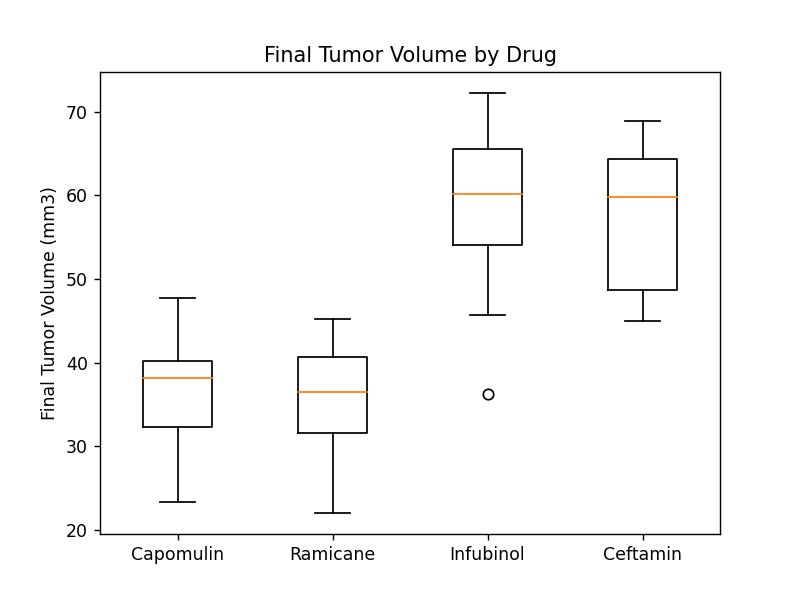

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


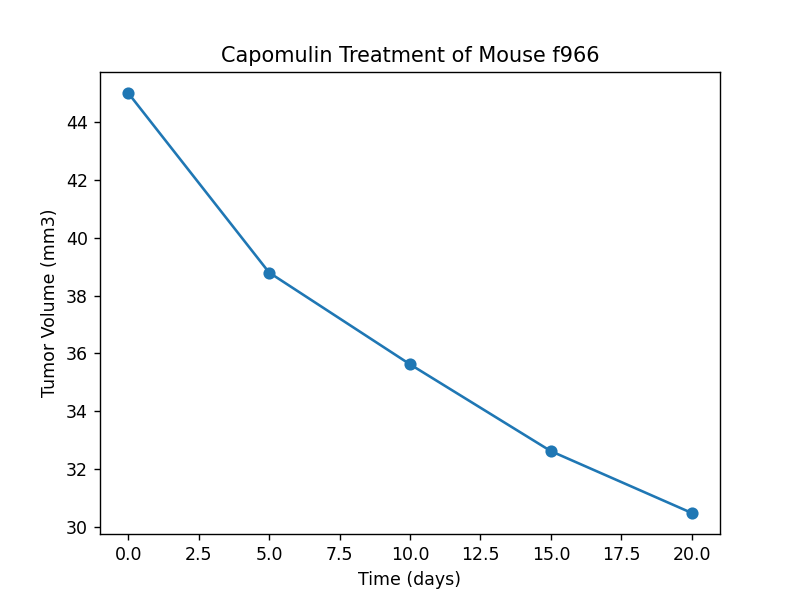

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = mouse_data_complete_df.loc[mouse_data_complete_df['Drug Regimen'] == 'Capomulin']
mouse_id
#mouse ID = f966

mouse = mouse_data_complete_df.loc[mouse_data_complete_df['Mouse ID'] == 'f966']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse f966")

# Display plot
plt.show()

<IPython.core.display.Javascript object>


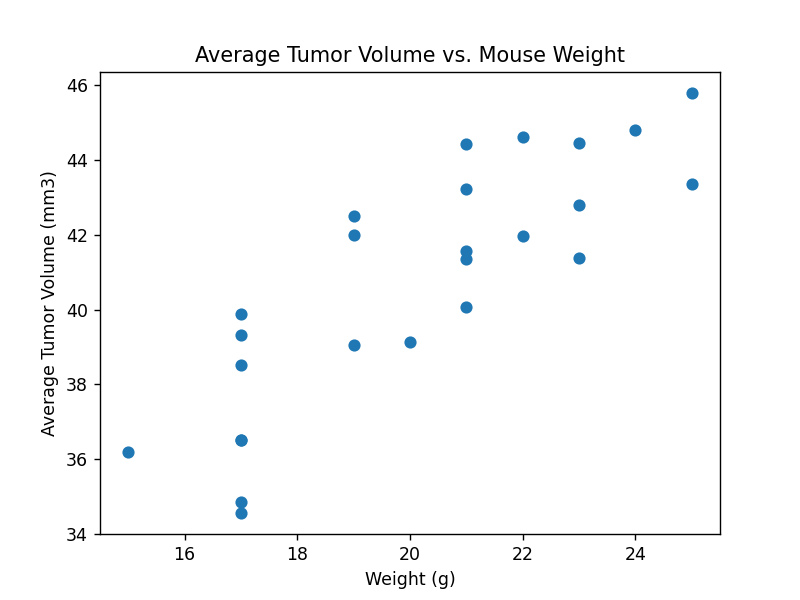

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Capomulin regimen
capomulin_df = mouse_data_complete_df.loc[mouse_data_complete_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for the mice receiving the Capomulin regimen is 0.84.


<IPython.core.display.Javascript object>


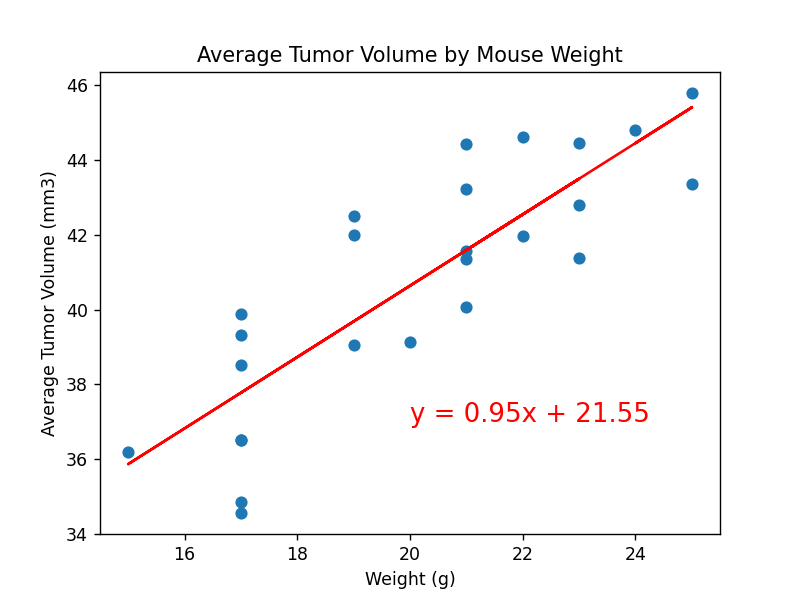

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)

print(f"The correlation between weight and average tumor volume for the mice receiving the Capomulin regimen is {round(correlation[0],2)}.")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Mouse Weight')
plt.show()

# Observations and Insights

In [ ]:
Final Analysis
Capomulin and Ramicane reduces the tumor size better.

There is a positive correlation between mouse weight and average tumor volume, it is 0.84. As the mouse weight increases, the average tumor volume increases too.

The bar graph shows that Capomulin and Ramicane had the most number of mice tested.